In [2]:
import torch
import numpy as np
from hmc_u1 import HMC_U1
from utils import hmc_summary


In [5]:
# Parameters
lattice_size = 8 
volume = lattice_size ** 2
beta = 3
n_thermalization_steps = 200
n_steps = 50
step_size = 0.2
store_interval = 1
n_iterations = store_interval * 2048

# Initialize device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

# Set default type
torch.set_default_dtype(torch.float32)

>>> No Field Transformation HMC Simulation: 


Running HMC: 100%|██████████| 2048/2048 [00:23<00:00, 86.77it/s]


>>> Simulation completed


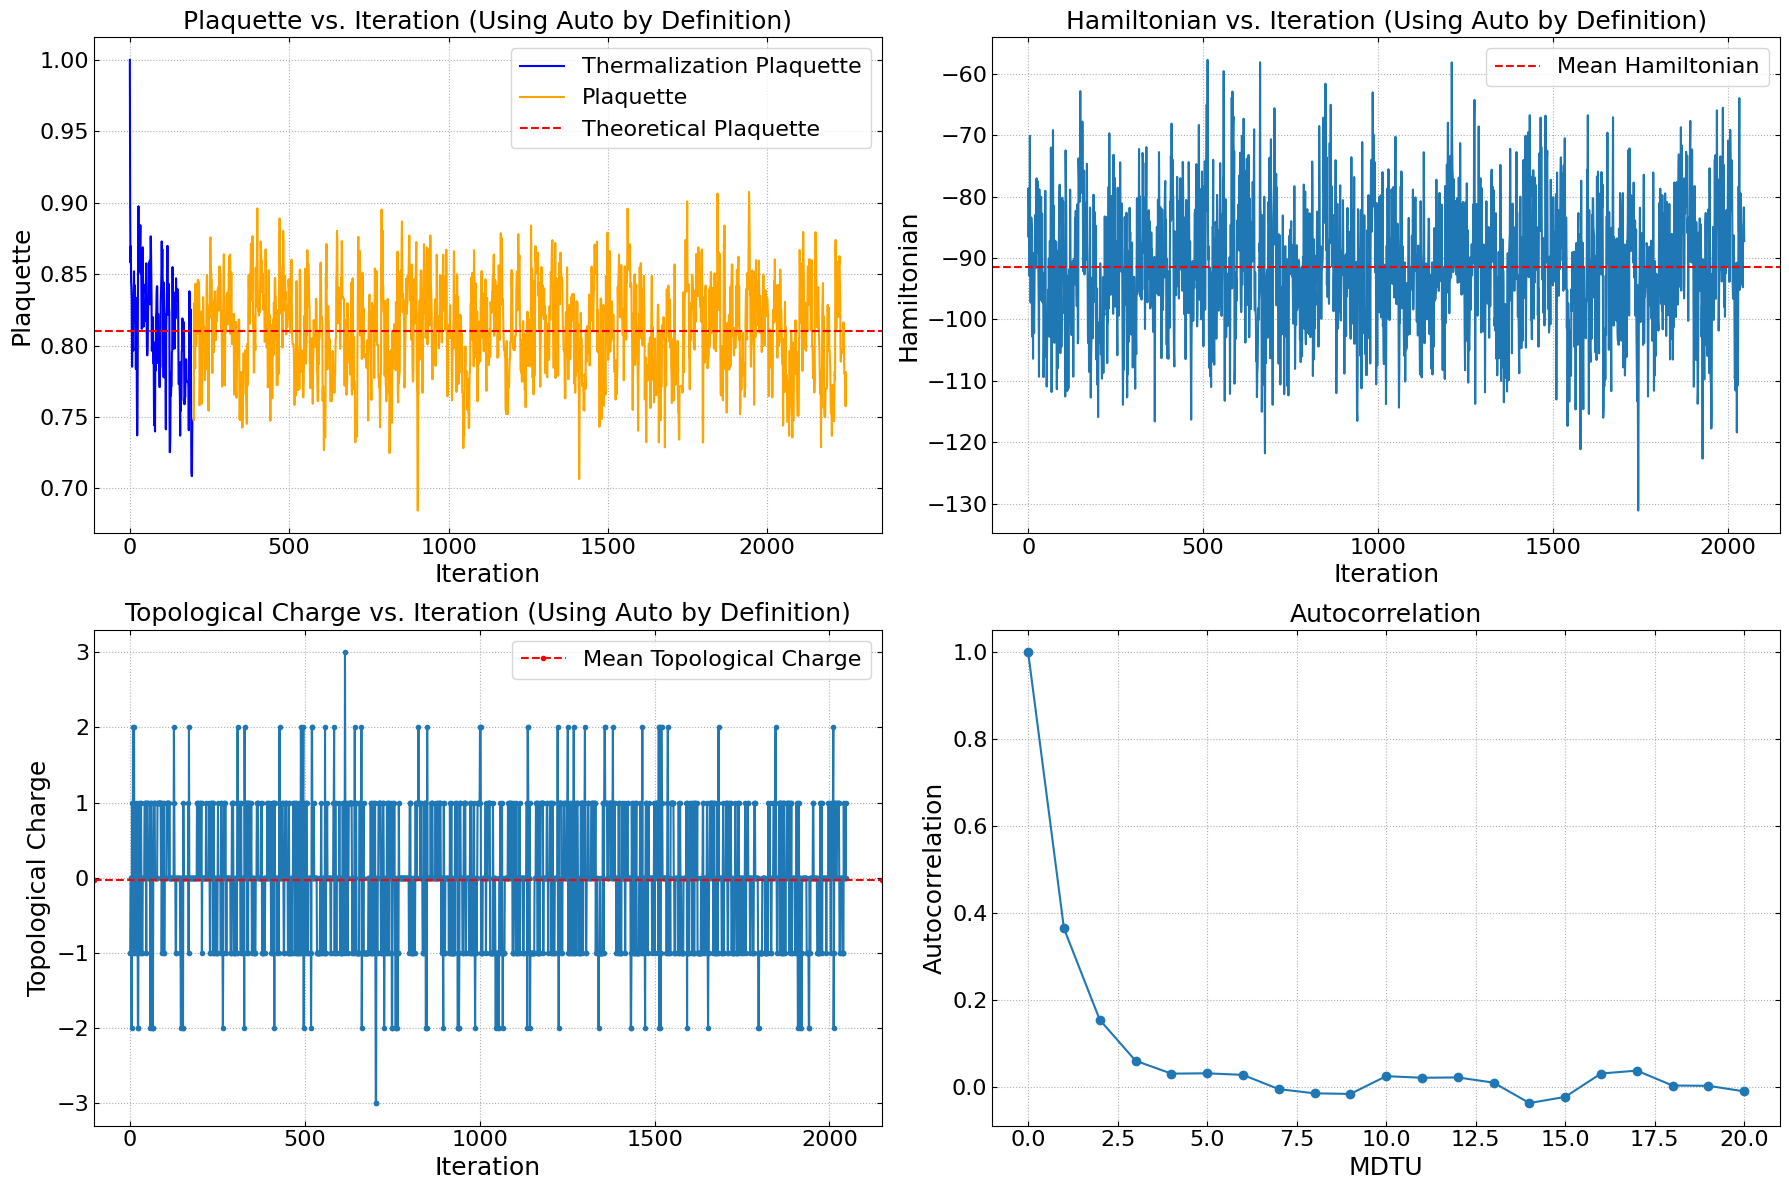

>>> Theoretical plaquette:  0.8099852939565045
>>> Mean plaq:  0.8106517202977557
>>> Std of mean plaq:  0.0007162713101868433
Thermalization acceptance rate: 0.7900
Acceptance rate: 0.7651


In [6]:
print(">>> No Field Transformation HMC Simulation: ")

# Initialize HMC
hmc = HMC_U1(lattice_size, beta, n_thermalization_steps, n_steps, step_size, device=device)

# Thermalize the system
theta_thermalized, therm_plaq_ls, therm_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
config_ls, plaq_ls, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized, store_interval)

print(">>> Simulation completed")


# Compute autocorrelation of topological charges
max_lag = 20
hmc_fig = hmc_summary(beta, max_lag, volume, therm_plaq_ls, plaq_ls, topological_charges, hamiltonians, therm_acceptance_rate, acceptance_rate)
hmc_fig.savefig(f'plots/hmc_L{lattice_size}_beta{beta}.pdf', transparent=True)

# Save configurations for training
np.save(f'dump/theta_ori_L{lattice_size}_beta{beta}.npy', torch.stack(config_ls).detach().cpu().numpy())
